In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, MaxPool2D
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
def import_maps(path):
    images = []
    for index, name in enumerate(os.listdir(path)):
        folder = os.path.join(path, name)
        for file_class in os.listdir(folder):
            im_folder = os.path.join(folder, file_class)

            for im in os.listdir(im_folder):
                img = cv2.imread(os.path.join(im_folder, im))
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                img = cv2.resize(img, (196, 196))
                if img is not None:
                    images.append((np.array(img), index)) 
    return images

In [3]:
image_train_set = import_maps(r'D:\ILBS_14_8_21_Sanjeev\ILBS_Clustered_Volumes\train')
image_test_set = import_maps(r'D:\ILBS_14_8_21_Sanjeev\ILBS_Clustered_Volumes\test')

In [51]:
train_images_all = [i[0] for i in image_train_set]
train_images_array = np.array(train_images_all)
#train_images_array=np.expand_dims(train_images_array,axis=3)
train_image_label = [i[1] for i in image_train_set]
train_image_label = np.array(train_image_label)

In [52]:
test_images_all = [i[0] for i in image_test_set]
test_images_array = np.array(test_images_all)
#test_images_array=np.expand_dims(test_images_array,axis=3)
test_image_label = [i[1] for i in image_test_set]
test_image_label = np.array(test_image_label)

In [53]:
scalar = StandardScaler(copy=False)
train_images = scalar.fit_transform(train_images_array.reshape(12900, 196*196))
train_images_array = train_images.reshape(12900, 196, 196, 1)

In [54]:
test_image = scalar.fit_transform(test_images_array.reshape(1950,196*196))
test_image_array = test_image.reshape(1950,196,196,1)

In [55]:
train_x, val_x, train_y, val_y = train_test_split(train_images_array,train_image_label,test_size=0.2)

In [56]:
enc = OneHotEncoder(handle_unknown='ignore')
train_label_enc = enc.fit_transform(train_y.reshape(-1, 1)).toarray()
val_label_enc = enc.fit_transform(val_y.reshape(-1, 1)).toarray()
test_label_enc = enc.fit_transform(test_image_label.reshape(-1, 1)).toarray()

In [83]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=(196, 196,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(6, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                            patience=15, min_lr=0.0001)
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 194, 194, 32)      320       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 192, 192, 32)      9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 73728)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4718656   
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 6)               

In [84]:
history = model.fit(train_x,train_label_enc,validation_data=(val_x,val_label_enc), batch_size=32, epochs=100, verbose=1,shuffle=True, callbacks = [reduce_lr])

Train on 10320 samples, validate on 2580 samples
Epoch 1/100
10320/10320 [==============================] - 12s 1ms/sample - loss: 1.4259 - accuracy: 0.4118 - val_loss: 1.3057 - val_accuracy: 0.4628s - loss: 1.4 - ETA: 2s - loss: 1
Epoch 2/100
10320/10320 [==============================] - 11s 1ms/sample - loss: 1.2678 - accuracy: 0.4871 - val_loss: 1.1769 - val_accuracy: 0.5391
Epoch 3/100
10320/10320 [==============================] - 11s 1ms/sample - loss: 1.1501 - accuracy: 0.5499 - val_loss: 1.0645 - val_accuracy: 0.6116- ETA: 0s - loss: 1.1515 - accuracy: 0.54 - ETA: 0s - loss: 1.1513 - accura
Epoch 4/100
10320/10320 [==============================] - 11s 1ms/sample - loss: 1.0525 - accuracy: 0.6048 - val_loss: 0.9633 - val_accuracy: 0.6764
Epoch 5/100
10320/10320 [==============================] - 11s 1ms/sample - loss: 0.9568 - accuracy: 0.6616 - val_loss: 0.8667 - val_accuracy: 0.7465
Epoch 6/100
10320/10320 [==============================] - 11s 1ms/sample - loss: 0.8716 - ac

10320/10320 [==============================] - 11s 1ms/sample - loss: 0.0769 - accuracy: 0.9731 - val_loss: 0.0493 - val_accuracy: 0.9694
Epoch 55/100
10320/10320 [==============================] - 11s 1ms/sample - loss: 0.0756 - accuracy: 0.9726 - val_loss: 0.0499 - val_accuracy: 0.9698
Epoch 56/100
10320/10320 [==============================] - 11s 1ms/sample - loss: 0.0743 - accuracy: 0.9734 - val_loss: 0.0489 - val_accuracy: 0.9721
Epoch 57/100
10320/10320 [==============================] - 11s 1ms/sample - loss: 0.0753 - accuracy: 0.9709 - val_loss: 0.0477 - val_accuracy: 0.9709
Epoch 58/100
10320/10320 [==============================] - 11s 1ms/sample - loss: 0.0720 - accuracy: 0.9743 - val_loss: 0.0478 - val_accuracy: 0.9698
Epoch 59/100
10320/10320 [==============================] - 11s 1ms/sample - loss: 0.0701 - accuracy: 0.9745 - val_loss: 0.0472 - val_accuracy: 0.9678
Epoch 60/100
10320/10320 [==============================] - 11s 1ms/sample - loss: 0.0712 - accuracy: 0.973

In [49]:
count=0
for i in val_y:
    if i==0:
        count +=1
    else:
        pass
print(count)

93


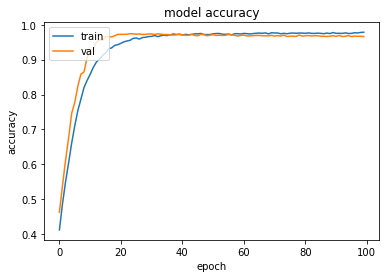

In [89]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

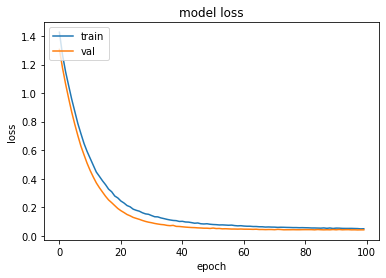

In [90]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [85]:
score = model.evaluate(test_image_array,test_label_enc,verbose=1)
print("Test loss:",score[0])
print("Test accuracy:",score[1])
score = model.evaluate(train_x,train_label_enc,verbose=1)
print("Train loss:",score[0])
print("Train accuracy:",score[1])

1950/1950 [==============================] - 1s 486us/sample - loss: 4.7254 - accuracy: 0.3323
Test loss: 4.725401180745699
Test accuracy: 0.3323077
10320/10320 [==============================] - 5s 441us/sample - loss: 0.0347 - accuracy: 0.9794
Train loss: 0.034744816106679136
Train accuracy: 0.97936046


In [86]:
y_predict = model.predict(test_image_array)

In [87]:
y_predict_bool = np.argmax(y_predict,axis=1).tolist()

In [88]:
confusion_matrix(test_image_label,y_predict_bool)#10epoch

array([[  0,   0, 122,  28,   0,   0],
       [  1,   0, 233,  55,  11,   0],
       [  0,   0, 190, 392,  18,   0],
       [  0, 102,  26, 458,  14,   0],
       [  0,   0, 150,   0,   0,   0],
       [  0,   0,  19, 131,   0,   0]], dtype=int64)

In [19]:
from sklearn.metrics import *

In [20]:
confusion_matrix(test_image_label,y_predict_bool)#10epoch

array([[  0,   0, 147,   3,   0,   0],
       [  0,   0, 196,  94,  10,   0],
       [ 12,   0, 189, 384,  15,   0],
       [  0, 102, 114, 383,   1,   0],
       [  0,   0, 150,   0,   0,   0],
       [  0,   0,  28, 122,   0,   0]], dtype=int64)